## Model

L1 和 L2 正則化是兩種常見的正則化技術，用於防止模型過擬合並提高模型的泛化能力。它們在正則化項的計算方式上有所不同，從而對模型的影響也不同。

### L1 正則化（Lasso 回歸）

L1 正則化通過在損失函數中加入模型參數的絕對值之和來進行正則化。其損失函數為：

$[ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| ]$

其中：
- $( y_i )$ 是實際值。
- $( \hat{y}_i )$ 是預測值。
- $( \beta_j )$ 是模型的回歸係數。
- $( \alpha )$ 是正則化強度的參數。

#### 特點：
- **特徵選擇**：L1 正則化可以使一些回歸係數變為零，從而實現特徵選擇。這對於高維數據中特徵數量多於樣本數的情況特別有用。
- **稀疏性**：L1 正則化會產生稀疏的模型，即只有少數幾個特徵會被選擇，而大部分特徵的係數為零。

### L2 正則化（Ridge 回歸）

L2 正則化通過在損失函數中加入模型參數的平方和來進行正則化。其損失函數為：

$[ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 ]$

其中：
- $( y_i )$ 是實際值。
- $( \hat{y}_i )$ 是預測值。
- $( \beta_j )$ 是模型的回歸係數。
- $( \alpha )$ 是正則化強度的參數。

#### 特點：
- **平滑性**：L2 正則化不會使係數變為零，而是讓所有的係數都趨向於較小的值。這有助於防止過擬合，並使模型更加平滑。
- **共線性處理**：L2 正則化對多重共線性問題有較好的處理效果，因為它能夠平滑地縮小回歸係數。

### L1 正則化的範例

L1 正則化（Lasso 回歸）

來減少無相關特徵，並比較不使用 L1 正則化和使用 L1 正則化的模型性能。

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [2]:
# 生成示例數據，添加一些不相關的特徵和增加噪音
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
# 添加20個不相關的特徵
X = np.hstack([X, np.random.randn(100, 20)])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 不使用L1正則化的線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')
print("Linear Regression Coefficients:", model.coef_)

Linear Regression Mean Squared Error: 176.42544323621857
Linear Regression Coefficients: [ 1.86152601e+01  5.60286490e+01  3.17357805e+00  6.24260862e+01
  9.27602895e+01  6.97597908e+01  8.33919942e+01  8.43747551e+00
  3.32648137e+00  6.98579993e+01  8.10967410e-01 -5.19313990e-02
  2.32945143e-01 -6.33442802e-01 -2.01294040e+00  7.11382164e-01
 -5.34978296e-01  1.10023675e+00 -5.72338086e-01 -1.84143496e-01
 -1.28005664e+00  1.42118542e+00  5.14756687e-02 -2.74431452e+00
 -1.92306794e+00 -1.78688773e+00  1.54404528e-01 -1.76629864e+00
  2.31370622e+00 -1.42360135e+00]


In [12]:
# 使用L1正則化的Lasso模型
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')
print("Lasso Regression Coefficients:", lasso.coef_)

Lasso Regression Mean Squared Error: 159.06667378029192
Lasso Regression Coefficients: [ 1.86899222e+01  5.52508833e+01  2.85421295e+00  6.22024022e+01
  9.22773394e+01  6.92918414e+01  8.35413601e+01  7.58646070e+00
  3.21031280e+00  6.95917535e+01  6.73828673e-01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.69821533e+00  6.45734141e-01
 -6.08342911e-02  4.63052777e-01 -0.00000000e+00 -2.27951480e-02
 -0.00000000e+00  1.33792938e+00  0.00000000e+00 -1.92942264e+00
 -1.45796087e+00 -1.41297736e+00 -1.36844165e-01 -1.16978280e+00
  1.65927657e+00 -9.11727343e-01]


## 比較不使用 L2 正則化和使用 L2 正則化（Ridge 回歸）的模型性能

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [18]:
# 生成示例數據，添加共線性特徵
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
# 添加共線性特徵（例如，特徵 1 是特徵 0 的線性組合）
X[:, 1] = X[:, 0] + np.random.normal(scale=0.01, size=100)
X[:, 2] = X[:, 0] - np.random.normal(scale=0.01, size=100)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# 不使用 L2 正則化的線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')
print("Linear Regression Coefficients:", model.coef_)

Linear Regression Mean Squared Error: 4138.155390347969
Linear Regression Coefficients: [-348.97361351 -413.24133264  776.7615637    56.68992678   93.75953369
   63.90743713   95.01631245   17.56965283    4.04604142   75.04900738]


In [21]:
# 使用 L2 正則化的Ridge模型
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print("Ridge Regression Coefficients:", ridge.coef_)

Ridge Regression Mean Squared Error: 3971.4711923480363
Ridge Regression Coefficients: [ 3.0987707  -0.42716649 12.72562403 55.68474605 94.02405288 64.32866989
 93.82732295 17.28873237  3.09030041 75.03258208]


# 時間序
# SARIMA(p,d,q)(P,D,Q)m
# 季節性自迴歸整合移動平均模型
我們終於來到時間序列分析中最有趣的部分之一：季節性。

ARIMA 接受參數 $(p,d,q)$，而 SARIMA 接受 <em>額外</em> 一組參數 $(P,D,Q)m$，這些參數專門描述模型的季節性部分。這裡的 $P$、$D$ 和 $Q$ 分別代表季節性回歸、差分和移動平均係數，$m$ 代表每個季節週期中的數據點（行）數。

pip install pmdarima

In [23]:
import pandas as pd
import numpy as np
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima #自動計算   SARIMAX 最佳參數

In [24]:
df = pd.read_csv("co2_mm_mlo.csv")
df

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [25]:
df['date'] = pd.to_datetime(dict(year=df['year'],month=df['month'],day=1))
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [26]:
df.set_index('date',inplace=True)
df.index.freq="MS"
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

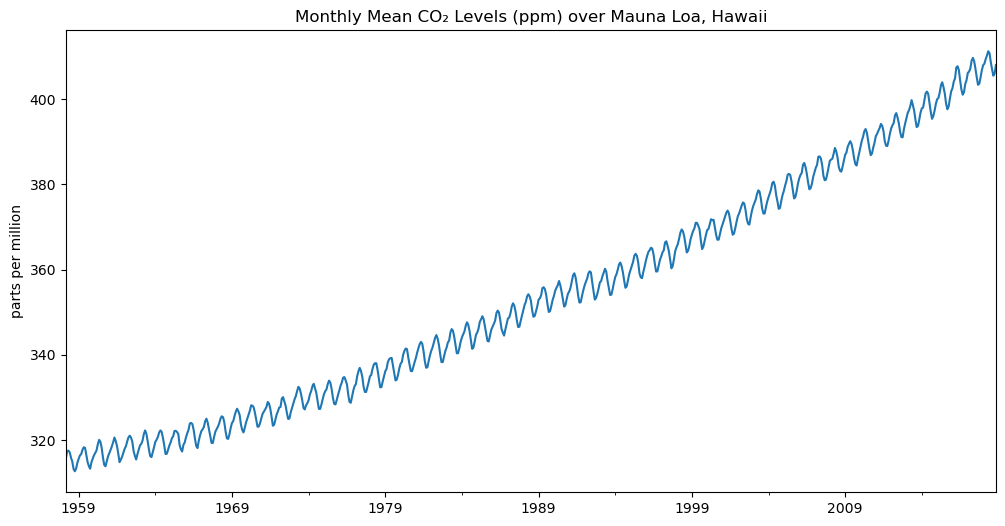

In [27]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

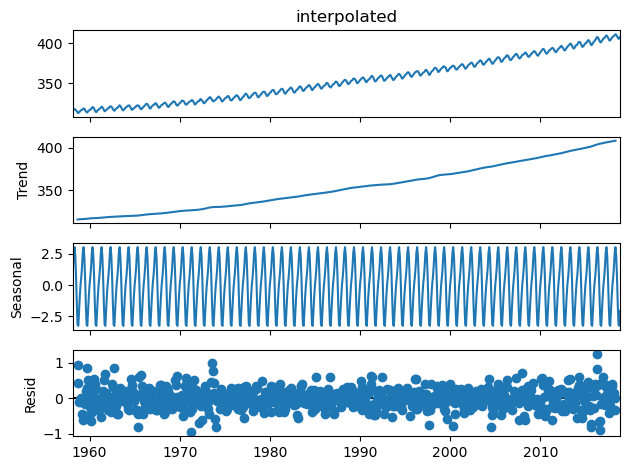

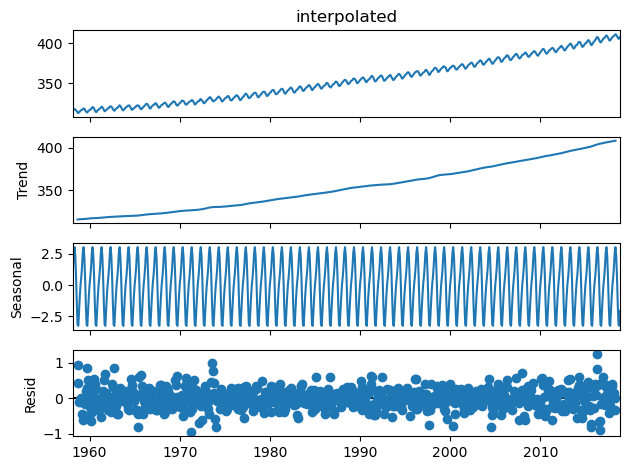

In [30]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot()

In [31]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.685
Date:                              Mon, 16 Dec 2024   AIC                            423.371
Time:                                      20:55:47   BIC                            450.913
Sample:                                  03-01-1958   HQIC                           433.998
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3564      0.036     -9.859      0.000      -0.427      -0.286
ma.L2         -0.0221      0.036     -0.607      0.544      -0.093       0.049
ma.L3         -0.0856      0.035     -2.424      0.015      -0.155      -0.016
ar.S.L12       0.9996      0.000   3138.111      0.000       0.999       1.000
ma.S.L12      -0.8672      0.021    -41.099      0.000      -0.909      -0.826
sigma2         0.0955      0.005     20.358      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.08
Prob(Q):                              0.79   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
train = df.iloc[:717]
test = df.iloc[717:]

In [33]:
model = SARIMAX(train["interpolated"],order=(0,1,3),seasonal_order=(1,0,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.225
Date:                              Mon, 16 Dec 2024   AIC                            414.451
Time:                                      21:04:50   BIC                            441.893
Sample:                                  03-01-1958   HQIC                           425.048
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3516      0.034    -10.321      0.000      -0.418      -0.285
ma.L2         -0.0237      0.037     -0.649      0.516      -0.095       0.048
ma.L3         -0.0859      0.035     -2.448      0.014      -0.155      -0.017
ar.S.L12       0.9997      0.000   3264.175      0.000       0.999       1.000
ma.S.L12      -0.8661      0.023    -38.418      0.000      -0.910      -0.822
sigma2         0.0951      0.005     20.293      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 4.42
Prob(Q):                              0.70   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end, dynamic=False).rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [35]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]} , test={test['interpolated'][i]}")
    

predicted=406.60950553565334 , test=406.81
predicted=407.8247213178738 , test=407.96
predicted=408.57855372604376 , test=408.32
predicted=409.4838267912542 , test=409.41
predicted=411.0409009336258 , test=410.24
predicted=411.6441503510025 , test=411.24
predicted=410.86407305182996 , test=410.79
predicted=409.17359464137957 , test=408.71
predicted=407.0727286100746 , test=406.99
predicted=405.622098545814 , test=405.51
predicted=405.8925397368791 , test=406.0
predicted=407.4265322931757 , test=408.02


C:\Users\xvpow\AppData\Local\Temp\ipykernel_12632\2360936869.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"predicted={predictions[i]} , test={test['interpolated'][i]}")


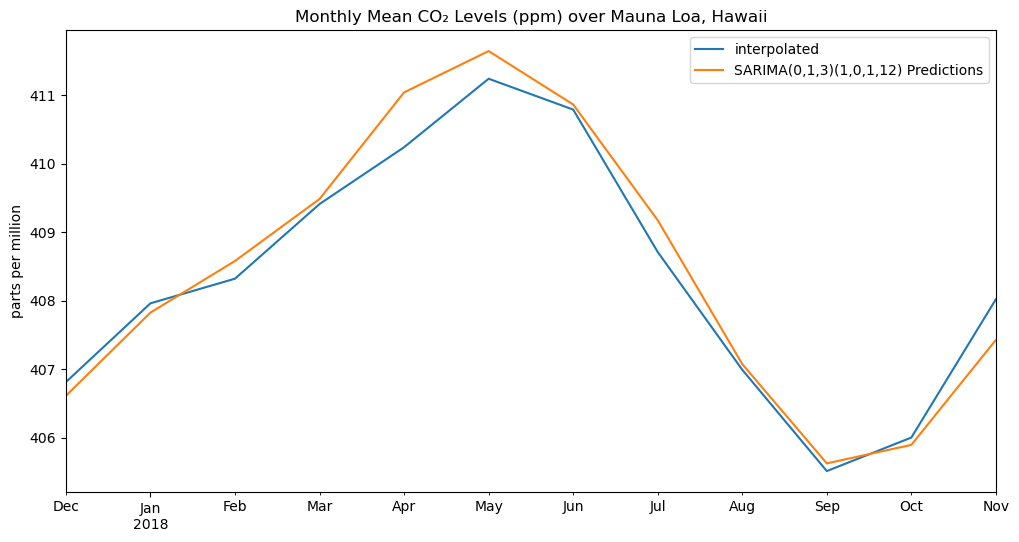

In [36]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [37]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:.5f}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 0.12826


## 梯度下降練習

[-5.   -2.   -0.8  -0.32 -0.13 -0.05]


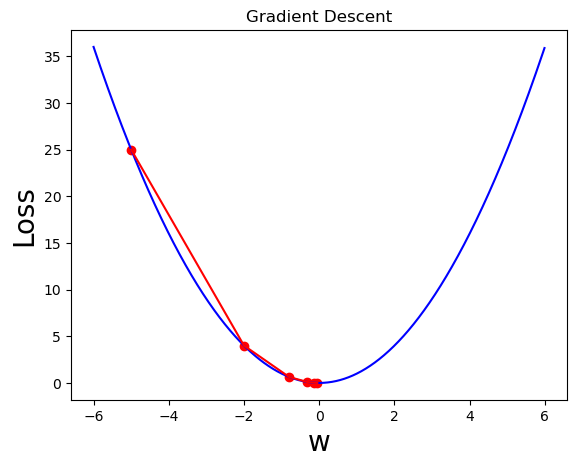

In [43]:
import numpy as np

import matplotlib.pyplot as plt


# 目標函數(損失函數):y=x^2
def func(x): return x ** 2

# 目標函數的一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 權重的更新W_new
        # W_new = W — learning_rate * gradient        
        w += - dx * lr         
        xs[i+1] = w    
    return xs

# Main
# 起始權重
x_start = -5    
# 執行週期數
epochs = 5
# 學習率   
lr = 0.3  
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

from matplotlib.font_manager import FontProperties

plt.title('Gradient Descent')
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.show()


## 手寫數字辨識

In [44]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [45]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [46]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [49]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',#adam會動態調整學習律
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Sparse Categorical Crossentropy 是一種用於多分類問題的損失函數。
#Accuracy（準確率） 是一種常用的衡量指標，表示模型預測正確的比例

In [50]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
#validation_split 驗證資料20% 拿12000驗證 拿48000資料訓練 每個Epoch訓練1500次
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)
#val_loss 越靠近loss 越好意味著模型沒有過擬合。
#val_accuracy 越靠近 accuracy 越好意味著模型具有很好的泛化能力

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3293 - accuracy: 0.9039 - val_loss: 0.1545 - val_accuracy: 0.9578
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1557 - accuracy: 0.9552 - val_loss: 0.1156 - val_accuracy: 0.9664
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1160 - accuracy: 0.9655 - val_loss: 0.0987 - val_accuracy: 0.9707
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0936 - accuracy: 0.9711 - val_loss: 0.0953 - val_accuracy: 0.9707
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9755 - val_loss: 0.0805 - val_accuracy: 0.9752


In [51]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)
for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0754
accuracy: 0.9773
